In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#открываем файлы с данными
df_users = pd.read_csv('/datasets/users.csv')
df_calls = pd.read_csv('/datasets/calls.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_internet = pd.read_csv('/datasets/internet.csv', index_col=0)
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [3]:
#изучаем общую информацию таблицы df_users
print(df_users.info())
print(df_users.describe())
df_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
#изучаем общую информацию таблицы df_calls
print(df_calls.info())
print(df_calls.describe())
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
#изучаем общую информацию таблицы df_messages
print(df_messages.info())
df_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
#изучаем общую информацию таблицы df_internet
print(df_internet.info())
print(df_internet.describe())
df_internet.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
None
             mb_used        user_id
count  149396.000000  149396.000000
mean      370.192426    1252.099842
std       278.300951     144.050823
min         0.000000    1000.000000
25%       138.187500    1130.000000
50%       348.015000    1251.000000
75%       559.552500    1380.000000
max      1724.830000    1499.000000


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [7]:
#изучаем общую информацию таблицы df_tariffs
print(df_tariffs.info())
df_tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


#### Вывод

Открыв файлы с данными и изучив общую информацию таблицы df_users, я обратил внимание на наличие пропусков в столбце churn_date, которые связаны с тем, что на момент выгрузки данных тариф абонента был активен (указано в описании данных). В любом случае, я решил не обрабатывать эти пропуски в связи с тем, что в дальнейшей работе данные этого столбца не понадобятся.

Изучив общую информацию таблицы df_calls, я заметил звонки с продолжительностью "0.0". Вероятно, это неотвеченные звонки или просто ошибочные данные. В первом случае ошибка может быть связана с несовершенством инструментов учета, а во втором - с проблемами обработки, хранения и передачи данных. Заполнить эти данные другими значениями нельзя, так как по правилам оператора даже 1 секунда разговора округляется до целой минуты, и это может значительно повлиять на результаты исследования. Поэтому необходимо будет удалить строчки с этими значениями. Та же ситуация наблюдается у данных столбца df_internet: нули, вероятно, означают ошибки - неучтенный трафик, поэтому строчки с нулями нужно будет удалить аналогично предыдущему пункту.

Общая информация таблиц df_messages, и df_tariffs не вызвала у меня никаких вопросов.

In [8]:
#избавимся от пропусков в столбце с продолжительностью звонков
df_calls = df_calls.query('duration != 0')
#проверка
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null object
duration     162994 non-null float64
user_id      162994 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
#избавимся от пропусков в столбце с объемом использованного трафика
df_internet = df_internet.query('mb_used != 0')
#проверка
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 4 columns):
id              129798 non-null object
mb_used         129798 non-null float64
session_date    129798 non-null object
user_id         129798 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.0+ MB


In [10]:
#добавляем в таблицу df_calls столбец с месяцем звонка на основе даты звонка
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y.%m.%d')
df_calls['month'] = pd.to_datetime(df_calls['call_date']).dt.month
#округлим вверх значения столбца с продолжительностью звонков
df_calls['duration'] = df_calls['duration'].apply(math.ceil)
#группируем данные продолжительности звонков по user_id и месяцу звонка
calls = df_calls.groupby(['user_id', 'month']).agg({'duration':'sum', 'id':'count'})
#сбрасываем индекс для дальнейшей работы со столбцами
calls = calls.reset_index()
#переименуем столбцы для дальнейшей группировки таблиц
calls.rename(columns={'id': 'calls_count', 'duration': 'calls_duration'}, inplace=True)
#проверка
calls.head()

,user_id,month,calls_duration,calls_count
0,1000,5,159,17
1,1000,6,172,28
2,1000,7,340,41
3,1000,8,408,42
4,1000,9,466,46


In [11]:
#добавляем в таблицу df_messages столбец с месяцем отправки смс на основе даты отправки смс
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y.%m.%d')
df_messages['month'] = pd.to_datetime(df_messages['message_date']).dt.month
#группируем данные по количеству отправленных смс по user_id и месяцу отправки смс
messages = df_messages.groupby(['user_id', 'month']).agg({'id':'count'})
#сбрасываем индекс для дальнейшей работы со столбцами
messages = messages.reset_index()
#переименуем столбцы для дальнейшей группировки таблиц
messages.rename(columns={'id': 'sms'}, inplace=True)
#проверка
messages.head()

,user_id,month,sms
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [12]:
#добавляем в таблицу df_internet столбец с месяцем сессии на основе даты сессии
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y.%m.%d')
df_internet['month'] = pd.to_datetime(df_internet['session_date']).dt.month
#округлим вверх значения столба с мобильным трафиком
df_internet['mb_used'] = df_internet['mb_used'].apply(math.ceil)
#группируем данные по трафику смс по user_id и месяцу сессии
internet = df_internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'})
#сбрасываем индекс для дальнейшей работы со столбцами
internet = internet.reset_index()
#проверка
internet.head()

,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


In [13]:
#для удобства удалим столбцы с именем и фамилией абонента, так как они не нужны для дальнейшей работы
#(нам достаточно другого идентификатора пользователя - id)
df_users = df_users.drop(['first_name', 'last_name'], axis=1)

In [14]:
#переименуем столбец для удобства
df_tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)
#объединим все датафреймы в один
data = calls.merge(messages, on=['user_id', 'month'], how='left')
data = data.merge(internet, on=['user_id', 'month'], how='left')
data = data.merge(df_users, on='user_id', how='left')
data = data.merge(df_tariffs, on='tariff', how='left')
#проверка
data.head()

,user_id,month,calls_duration,calls_count,sms,mb_used,age,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159,17,22.0,2256.0,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172,28,60.0,23257.0,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340,41,75.0,14016.0,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408,42,81.0,14070.0,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466,46,57.0,14581.0,52,NaN,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [15]:
#посмотрим, не образовались ли пропуски при группировке
print(data.info())
#заполним образовавшиеся в результате объединенния пропуски
data['mb_used'] = data['mb_used'].fillna(0)
data['sms'] = data['sms'].fillna(0)
#проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 0 to 3167
Data columns (total 18 columns):
user_id                  3168 non-null int64
month                    3168 non-null int64
calls_duration           3168 non-null int64
calls_count              3168 non-null int64
sms                      2673 non-null float64
mb_used                  3155 non-null float64
age                      3168 non-null int64
churn_date               187 non-null object
city                     3168 non-null object
reg_date                 3168 non-null object
tariff                   3168 non-null object
messages_included        3168 non-null int64
mb_per_month_included    3168 non-null int64
minutes_included         3168 non-null int64
rub_monthly_fee          3168 non-null int64
rub_per_gb               3168 non-null int64
rub_per_message          3168 non-null int64
rub_per_minute           3168 non-null int64
dtypes: float64(2), int64(12), object(4)
memory usage: 470.2+ KB
None
<class

In [16]:
#приведем данные к нужному типу
data['sms'] = data['sms'].astype('int')
data['mb_used'] = data['mb_used'].astype('int')
#проверка
data.dtypes

user_id                   int64
month                     int64
calls_duration            int64
calls_count               int64
sms                       int64
mb_used                   int64
age                       int64
churn_date               object
city                     object
reg_date                 object
tariff                   object
messages_included         int64
mb_per_month_included     int64
minutes_included          int64
rub_monthly_fee           int64
rub_per_gb                int64
rub_per_message           int64
rub_per_minute            int64
dtype: object

In [17]:
#рассчитаем помесячную выручку с каждого пользователя
def ppm(row):
    proceeds_per_month = row['rub_monthly_fee']
    proceeds_per_calls = (row['calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    proceeds_per_messages = (row['sms'] - row['messages_included']) * row['rub_per_message']
    proceeds_per_internet = (row['mb_used'] - row['mb_per_month_included']) * (row['rub_per_gb'] / 1024)
    for element in [proceeds_per_internet, proceeds_per_calls, proceeds_per_messages]:
        if element > 0:
            proceeds_per_month += element
    return proceeds_per_month
data['proceeds_per_month'] = data.apply(ppm, axis=1)
#проверка
data.sample(5)

,user_id,month,calls_duration,calls_count,sms,mb_used,age,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,proceeds_per_month
846,1135,7,382,44,22,19434,64,NaN,Архангельск,2018-01-29,smart,50,15360,500,550,200,3,3,1345.703125
27,1004,10,145,21,165,18494,68,NaN,Новокузнецк,2018-05-14,ultra,1000,30720,3000,1950,150,1,1,1950.000000
460,1072,5,342,40,20,28812,49,NaN,Уфа,2018-02-20,smart,50,15360,500,550,200,3,3,3177.343750
2431,1385,10,368,38,127,27298,26,NaN,Москва,2018-01-13,ultra,1000,30720,3000,1950,150,1,1,1950.000000
2287,1368,12,403,45,89,20500,50,NaN,Омск,2018-12-14,smart,50,15360,500,550,200,3,3,1670.906250


#### Вывод

Перейдя ко второму шагу, я избавился от нулевых значений в столбцах с количеством использованных минут и потребленного трафика, описаным выше образом.

Далее я решил немного изменить последовательность работы и сначала объединил таблицы, заранее округлив количество минут и мегабайт, а также рассчитав для каждого пользователя количество сделанных звонков, израсходованных минут разговора, количество отправленных сообщений и объем израсходованного интернет-трафика по месяцам.

В результате объединенния таблиц возникли пропуски в столбцах mb_used и sms. Это вызвано тем, что часть абонентов могла не отправлять смс или не пользоваться мобильным интернетом на протяжении всего месяца, пользуясь лишь мобильной связью, и тогда в соответствующем столбце после объединения образуется пропуск. Появившиеся пропуски я заполнил, соответственно, нулями. Затем я привел данные столбцов sms и mb_used к целочисленному типу.

После этого я перешел к последней задаче, поставленной в этом шаге проекта - расчету помесячной выручки с каждого пользователя, для чего написал формулу, использующую данные объединенной таблицы.

In [18]:
#рассчитаем по обоим тарифам среднее количество минут разговора, сообщений и интернет-трафика,
#а также их дисперсию и стандартное отклонение
print('Тариф Smart:')
print(data.query('tariff == "smart"')[['calls_duration','sms','mb_used']].describe())
print('Тариф Ultra:')
print(data.query('tariff == "ultra"')[['calls_duration','sms','mb_used']].describe())
#выведем на экран сводную таблицу
data.pivot_table(index='tariff', values=['calls_duration','sms','mb_used'], aggfunc=['mean','var','std'])

Тариф Smart:
       calls_duration          sms       mb_used
count     2221.000000  2221.000000   2221.000000
mean       419.440342    33.392166  16231.462404
std        188.992403    28.270233   5883.447131
min          2.000000     0.000000      0.000000
25%        285.000000    10.000000  12672.000000
50%        423.000000    28.000000  16527.000000
75%        546.000000    51.000000  20068.000000
max       1435.000000   143.000000  38610.000000
Тариф Ultra:
       calls_duration         sms       mb_used
count      947.000000  947.000000    947.000000
mean       547.755016   48.759240  19489.672650
std        305.513385   46.601785  10137.035902
min          1.000000    0.000000      0.000000
25%        311.000000    5.000000  11633.500000
50%        529.000000   39.000000  19335.000000
75%        758.000000   78.500000  26867.000000
max       1673.000000  224.000000  49789.000000


mean                                     var                \
       calls_duration       mb_used        sms calls_duration       mb_used   
tariff                                                                        
smart      419.440342  16231.462404  33.392166   35718.128534  3.461495e+07   
ultra      547.755016  19489.672650  48.759240   93338.428291  1.027595e+08   

                               std                           
                sms calls_duration       mb_used        sms  
tariff                                                       
smart    799.206047     188.992403   5883.447131  28.270233  
ultra   2171.726328     305.513385  10137.035902  46.601785

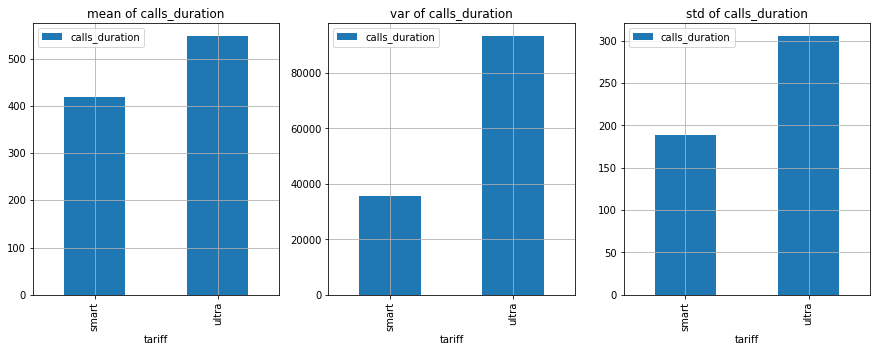

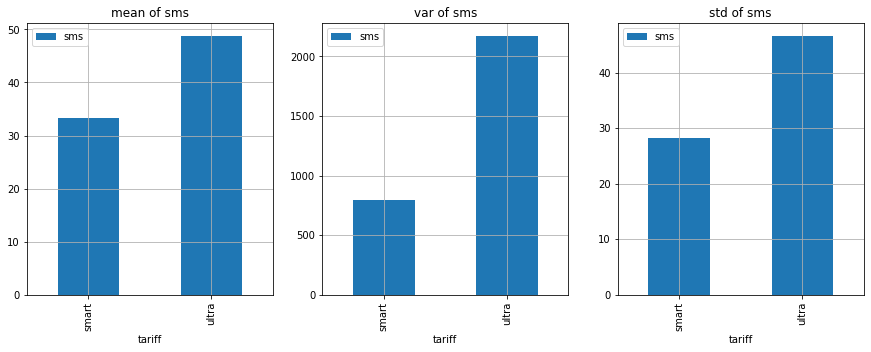

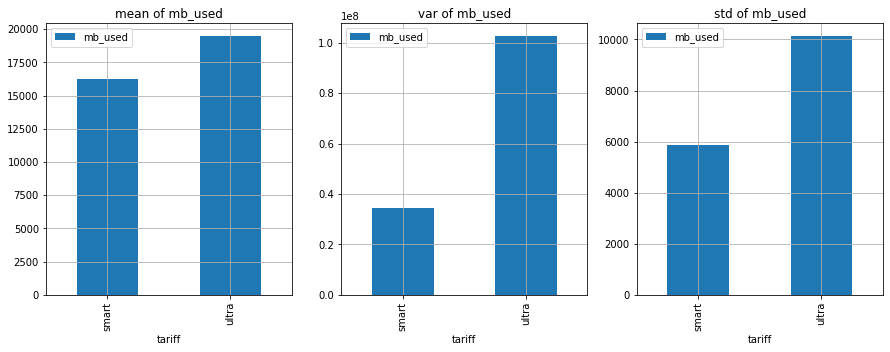

In [19]:
#построим столбчатые диаграммы по обоим тарифам для среднего количества минут разговора, сообщений и интернет-трафика,
#а также дисперсии и стандартного отклонения
def hist_for_data(data):
    for column in ['calls_duration', 'sms', 'mb_used']:
        position = 131
        plt.subplots(figsize=(15,5))
        for function in ['mean', 'var', 'std']:
            data.pivot_table(index='tariff', values=column, aggfunc=function).plot(kind='bar', grid=True, ax=plt.subplot(position)).set_title(function+' of '+column)
            position += 1
        plt.show()
hist_for_data(data)

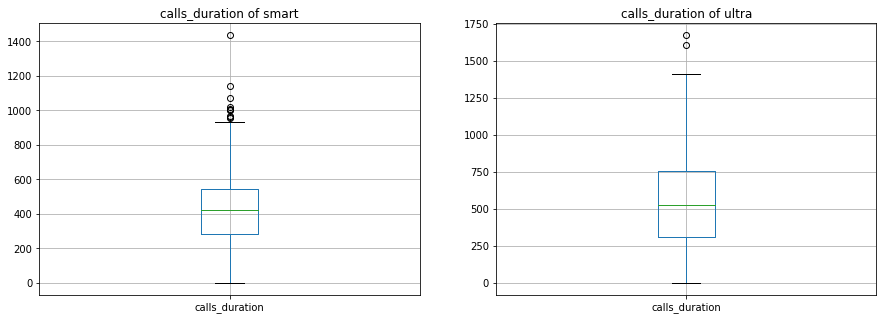

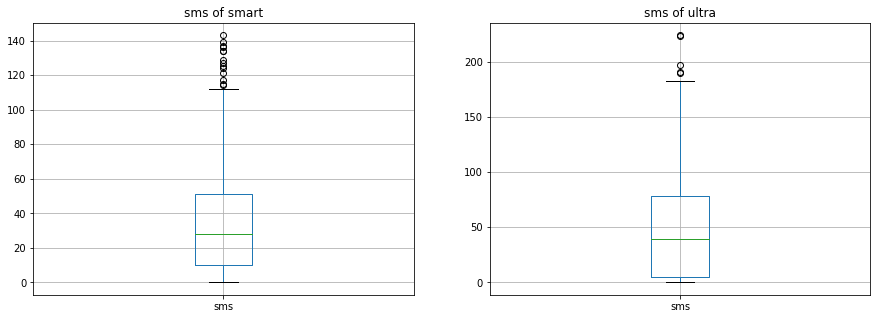

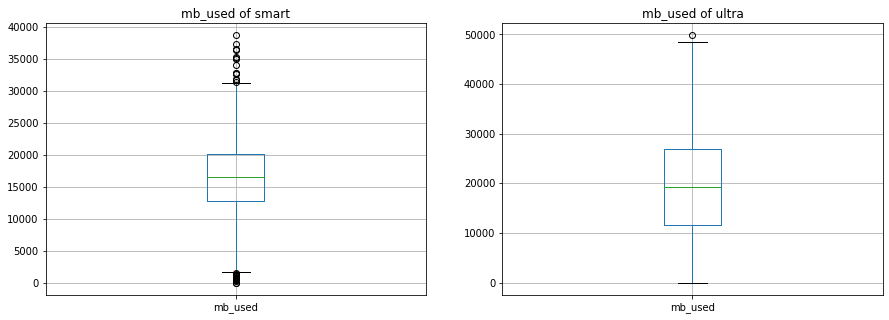

In [20]:
#построим диаграммы рассеяния по обоим тарифам для количества минут разговора, сообщений и интернет-трафика
def boxplot_for_data(data):
    for column in ['calls_duration', 'sms', 'mb_used']:
        position = 121
        plt.subplots(figsize=(15,5))
        for tariff in ['smart', 'ultra']:
            data.query('tariff == @tariff').boxplot(column=column, ax=plt.subplot(position)).set_title(column+' of '+tariff)
            position += 1
        plt.show()
boxplot_for_data(data)

#### Вывод

Применив метод describe и создав столбчатые диаграммы и диаграммы распределения, я рассчитал и визуализировал среднее количество минут разговора, сообщений и интернет-трафика, а также их дисперсию и стандартное отклонение по обоим тарифам.

Исходя из выборки, клиентам оператора с тарифом ultra в месяц нужно больше минут (на 25%), смс (на 30%) и мобильного трафика (на 15%). Соотношение дисперсии и стандартного отклонения всех параметров у тарифов примерно одинаковое.

Судя по диаграммам размаха, продолжительность звонков в тарифе smart распределена нормально, в то время как в тарифе ultra датасет скошен вправо. Количество отправленных смс по тем же данным сильно скошено вправо в обоих случаях, но у ultra - сильнее. Наконец, количество потребленного трафика в тарифе smart распределено нормально, а у ultra немного скошено вправо.

Кроме того, судя по диаграммам размаха, выбросы более характерны для тарифа smart, что вполне логично, учитывая меньшие лимиты звонков, смс и интернета. Возможно, таким пользователям стоит подумать о переходе на более выгодный тариф - ultra.

In [21]:
#проверяем гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
alpha = .05
results = st.ttest_ind(data.query('tariff == "smart"')['proceeds_per_month'], data.query('tariff == "ultra"')['proceeds_per_month'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.754210213324941e-184
Отвергаем нулевую гипотезу


#### Вывод

Чтобы ответить на первый из главных вопросов проекта - различается ли средняя выручка пользователей тарифов «Ультра» и «Смарт» - я выдвинул нулевую гипотезу о том, что выручки обоих тарифов равны, и альтернативную - о том, что они, соответственно, не равны. Далее необходимо было определиться с критерием проверки выдвинутой гипотезы. Поскольку у нас большое количество одинаковых значений в столбце с выручкой (критерий Манна-Уитни неприменим) и неизвестна дисперсия генеральной совокупности (z-критерий Фишера неприменим), я решил воспользоваться t-критерием Стьюдента. И так как мы выдвинули гипотезу о равенстве двух совокупностей, я применил метод scipy.stats.ttest_ind(), задав пороговое значение уровня занчимости равное 5%.

В итоге, уровень значимости оказался значительно ниже 5%, а это значит, что нулевая гипотеза не подтвердилась, следовательно, средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

In [22]:
#проверяем гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
alpha = .05
results = st.ttest_ind(data.query('city == "Москва"')['proceeds_per_month'], data.query('city != "Москва"')['proceeds_per_month'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3874178887230333
Не получилось отвергнуть нулевую гипотезу


#### Вывод

Наконец, чтобы ответить на второй главный вопрос проекта - отличается ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов - я выдвинул нулевую гипотезу о том, что выручки в обоих случаях равны, и альтернативную - о том, что они, соответственно, не равны. Как и прежде, я решил воспользоваться t-критерием Стьюдента (по тем же причинам). И так как мы выдвинули гипотезу о равенстве двух совокупностей, я снова применил метод scipy.stats.ttest_ind(), задав пороговое значение уровня занчимости равное 5%.

В итоге, уровень значимости оказался равным 39% - больше 5%, что означает, что отвергнуть нулевую гипотезу не получилось, следовательно, средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

## Общий вывод

Подводя итоги проекта, я могу сказать, что, судя по выборке, клиентам оператора с тарифом ultra в месяц нужно больше минут (на 25%), смс (на 30%) и мобильного трафика (на 15%). В то же время пользователи тарифа smart зачастую значительно превышают предоставленный лимит по всем параметрам.

В проекте были выдвинуты две гипотезы: "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается" и "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов". Выдвинув соответствующие нулевые гипотезы и воспользовавшись t-критерием Стьюдента, я пришел к выводу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, а средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.